In [1]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv(r"C:\Users\sekha\Downloads\supply_chain_data.csv")

In [5]:
data.head()

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


In [7]:
data.describe()

,Price,Availability,Number of products sold,Revenue generated,Stock levels,Lead times,Order quantities,Shipping times,Shipping costs,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Defect rates,Costs
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000
mean,49.462461,48.400000,460.990000,5776.048187,47.770000,15.960000,49.220000,5.750000,5.548149,17.080000,567.840000,14.77000,47.266693,2.277158,529.245782
std,31.168193,30.743317,303.780074,2732.841744,31.369372,8.785801,26.784429,2.724283,2.651376,8.846251,263.046861,8.91243,28.982841,1.461366,258.301696
min,1.699976,1.000000,8.000000,1061.618523,0.000000,1.000000,1.000000,1.000000,1.013487,1.000000,104.000000,1.00000,1.085069,0.018608,103.916248
25%,19.597823,22.750000,184.250000,2812.847151,16.750000,8.000000,26.000000,3.750000,3.540248,10.000000,352.000000,7.00000,22.983299,1.009650,318.778455
50%,51.239831,43.500000,392.500000,6006.352023,47.500000,17.000000,52.000000,6.000000,5.320534,18.000000,568.500000,14.00000,45.905622,2.141863,520.430444
75%,77.198228,75.000000,704.250000,8253.976921,73.000000,24.000000,71.250000,8.000000,7.601695,25.000000,797.000000,23.00000,68.621026,3.563995,763.078231
max,99.171329,100.000000,996.000000,9866.465458,100.000000,30.000000,96.000000,10.000000,9.929816,30.000000,985.000000,30.00000,99.466109,4.939255,997.413450


In [9]:
data.shape

(100, 24)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product type             100 non-null    object 
 1   SKU                      100 non-null    object 
 2   Price                    100 non-null    float64
 3   Availability             100 non-null    int64  
 4   Number of products sold  100 non-null    int64  
 5   Revenue generated        100 non-null    float64
 6   Customer demographics    100 non-null    object 
 7   Stock levels             100 non-null    int64  
 8   Lead times               100 non-null    int64  
 9   Order quantities         100 non-null    int64  
 10  Shipping times           100 non-null    int64  
 11  Shipping carriers        100 non-null    object 
 12  Shipping costs           100 non-null    float64
 13  Supplier name            100 non-null    object 
 14  Location                 10

In [13]:
# Checking Null Values
data.isnull().sum().any()

False

# EDA (Exploratory Data Analysis)

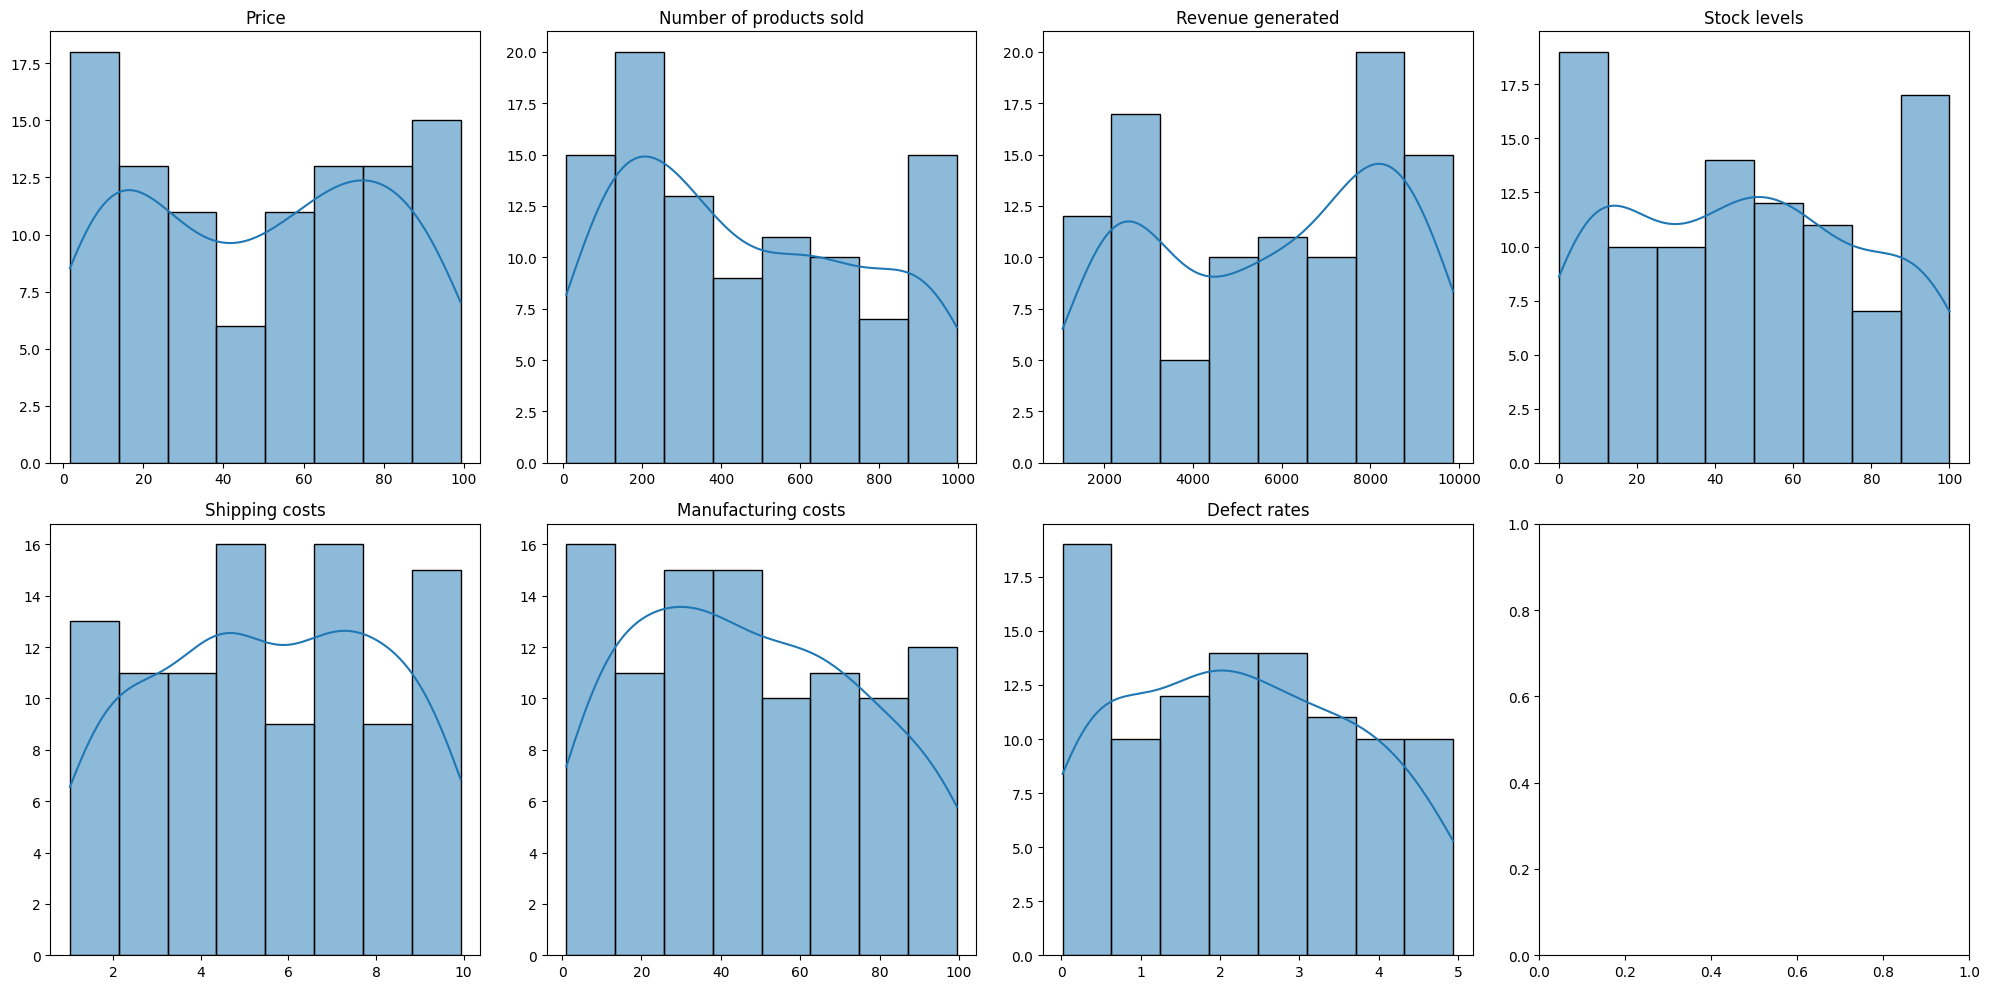

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv(r"C:\Users\sekha\Downloads\supply_chain_data.csv")

# Selecting columns for visualization
selected_columns = ['Price', 'Number of products sold', 'Revenue generated', 'Stock levels',
                    'Shipping costs', 'Manufacturing costs', 'Defect rates']

# Creating subplots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))

# Flatten the axes array
axes = axes.flatten()

# Plotting each selected column
for i, column in enumerate(selected_columns):
    sns.histplot(df[column], ax=axes[i], kde=True)
    axes[i].set_title(column)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

# Adjust layout
plt.tight_layout()
plt.show()

In [26]:
import pandas as pd

# Frequency distribution for categorical variables
categorical_variables = [
    'Product type', 'Customer demographics', 'Shipping carriers',
    'Supplier name', 'Location', 'Inspection results',
    'Transportation modes', 'Routes'
]

# Create a dictionary of DataFrames
frequency_distribution = {
    col: df[col].value_counts().reset_index().rename(columns={'index': col, col: 'Count'})
    for col in categorical_variables
}

# Display each variable's frequency distribution separately (like your format)
for col, freq_df in frequency_distribution.items():
    print(f"\n{col}:")
    display(freq_df)



Product type:


,Count,count
0,skincare,40
1,haircare,34
2,cosmetics,26



Customer demographics:


,Count,count
0,Unknown,31
1,Female,25
2,Non-binary,23
3,Male,21



Shipping carriers:


,Count,count
0,Carrier B,43
1,Carrier C,29
2,Carrier A,28



Supplier name:


,Count,count
0,Supplier 1,27
1,Supplier 2,22
2,Supplier 5,18
3,Supplier 4,18
4,Supplier 3,15



Location:


,Count,count
0,Kolkata,25
1,Mumbai,22
2,Chennai,20
3,Bangalore,18
4,Delhi,15



Inspection results:


,Count,count
0,Pending,41
1,Fail,36
2,Pass,23



Transportation modes:


,Count,count
0,Road,29
1,Rail,28
2,Air,26
3,Sea,17



Routes:


,Count,count
0,Route A,43
1,Route B,37
2,Route C,20


In [42]:
import warnings
warnings.filterwarnings("ignore")


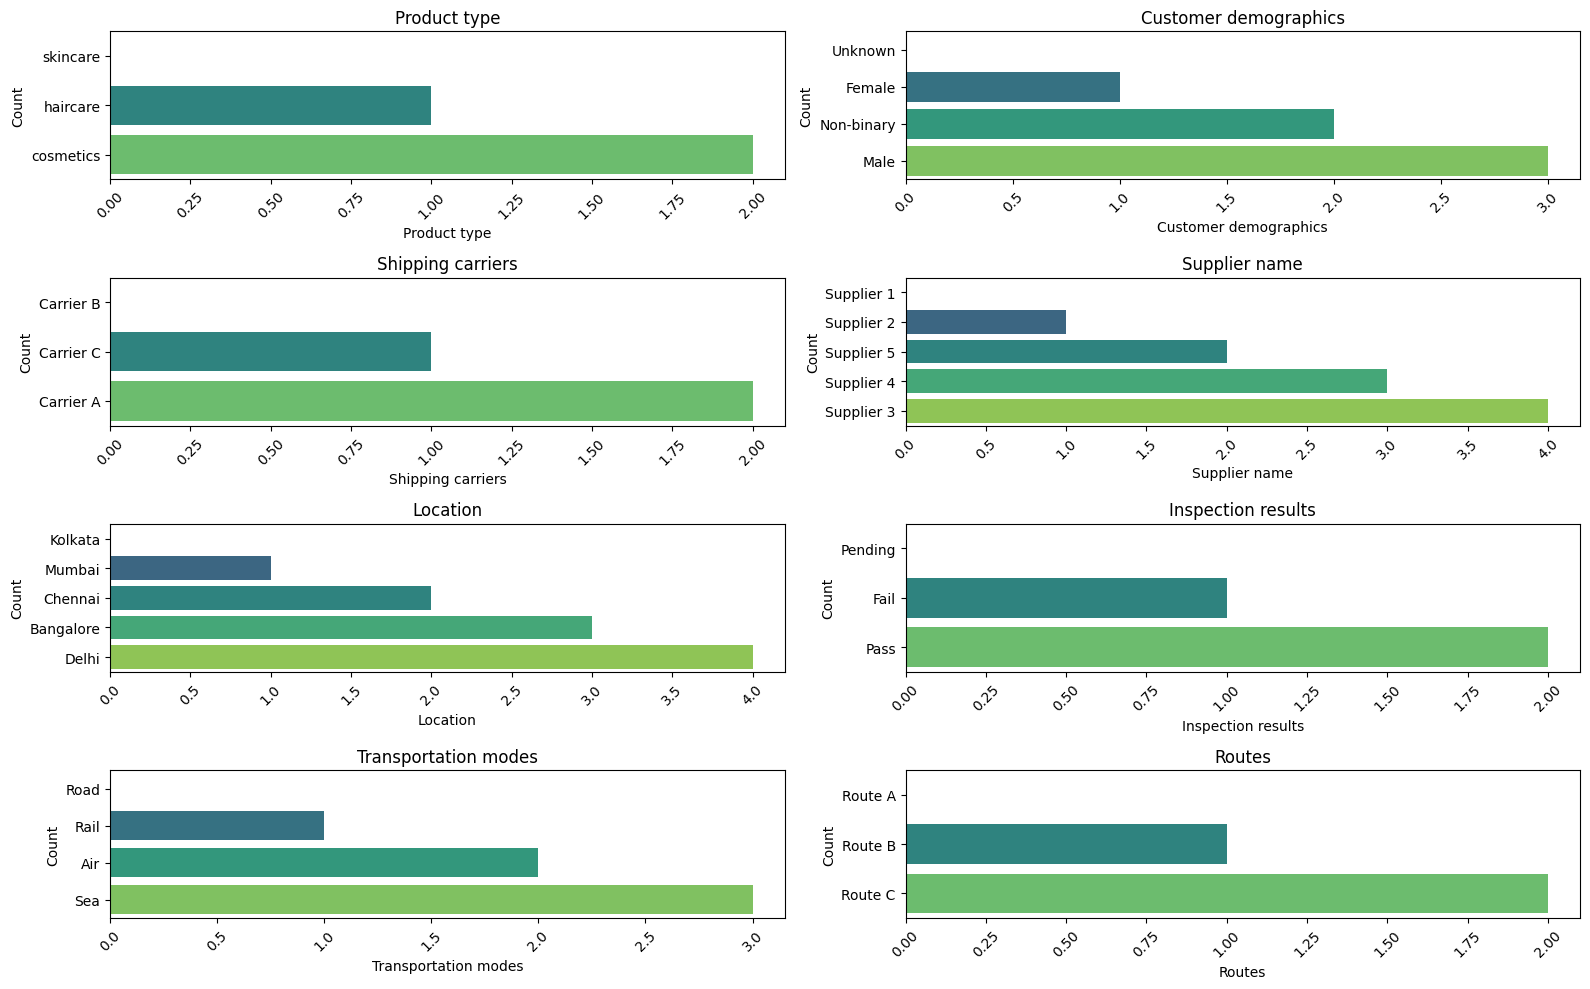

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

num_plots = len(frequency_distribution)
num_cols = 2
num_rows = (num_plots + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 10))
axes = axes.flatten()

for i, (col, freq_dist) in enumerate(frequency_distribution.items()):
    freq_df = freq_dist.reset_index()
    freq_df = freq_df.iloc[:, :2]  # take only first two columns
    freq_df.columns = [col, 'Count']
    
    ax = axes[i]
    sns.barplot(data=freq_df, x=col, y='Count', ax=ax, palette="viridis")
    ax.set_title(col)
    ax.set_xlabel(col)
    ax.set_ylabel("Count")
    ax.tick_params(axis='x', rotation=45)

# Hide unused subplots
for i in range(num_plots, num_rows * num_cols):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


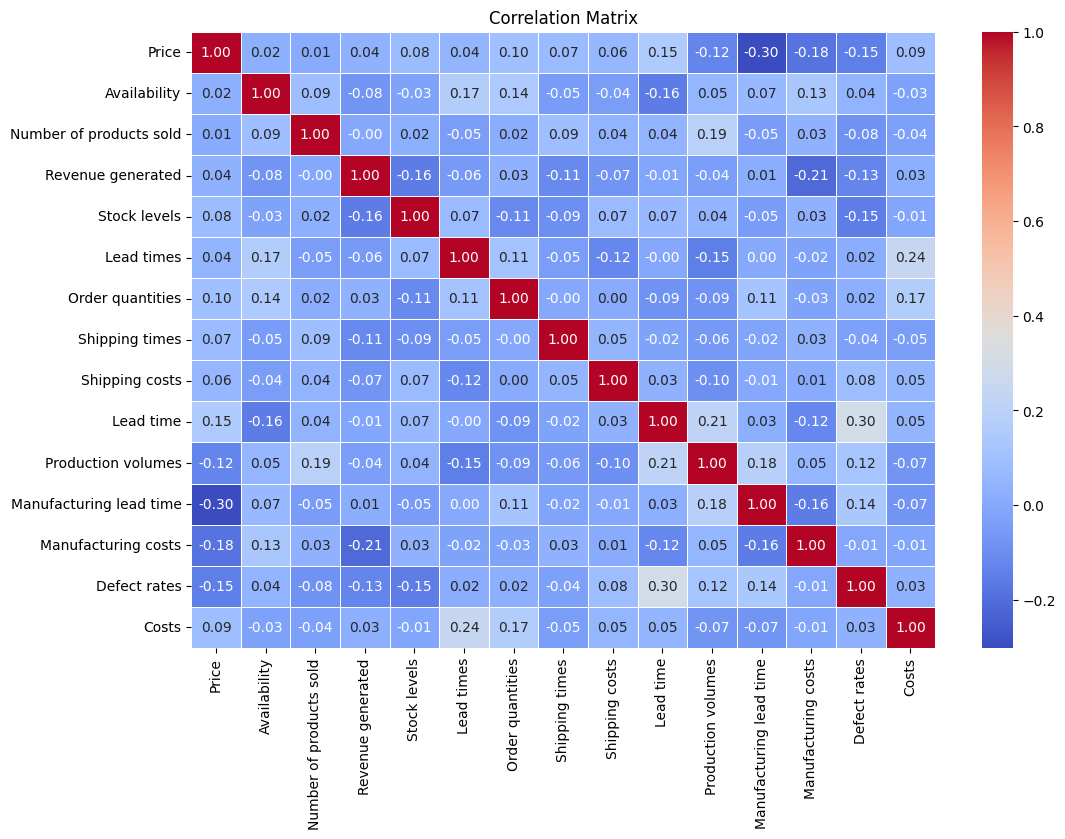

In [46]:
# Define numerical variables and compute correlation matrix
numerical_variables = ['Price', 'Availability', 'Number of products sold', 'Revenue generated', 'Stock levels', 'Lead times', 'Order quantities', 'Shipping times', 'Shipping costs', 'Lead time', 'Production volumes', 'Manufacturing lead time', 'Manufacturing costs', 'Defect rates', 'Costs']
correlation_matrix = df[numerical_variables].corr(method='pearson')

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [48]:
data['Product type'].unique()

array(['haircare', 'skincare', 'cosmetics'], dtype=object)

In [50]:
data['Transportation modes'].unique()

array(['Road', 'Air', 'Rail', 'Sea'], dtype=object)

In [52]:
data['Routes'].unique()

array(['Route B', 'Route C', 'Route A'], dtype=object)

In [54]:
data['Customer demographics'].unique()

array(['Non-binary', 'Female', 'Unknown', 'Male'], dtype=object)

In [56]:
data['Location'].unique()

array(['Mumbai', 'Kolkata', 'Delhi', 'Bangalore', 'Chennai'], dtype=object)

# Sales Data

In [84]:
sales_data = data.groupby('Product type')['Number of products sold'].sum().reset_index()
sales_data

,Product type,Number of products sold
0,cosmetics,11757
1,haircare,13611
2,skincare,20731


In [86]:
pie_chart = px.pie(sales_data, values='Number of products sold', names='Product type',
                  title='Sales by Product Type',
                  hover_data=['Number of products sold'],
                  hole=0.45,
                  color_discrete_sequence=px.colors.qualitative.Pastel)
pie_chart.update_traces(textposition='inside',textinfo='percent')
pie_chart.show()

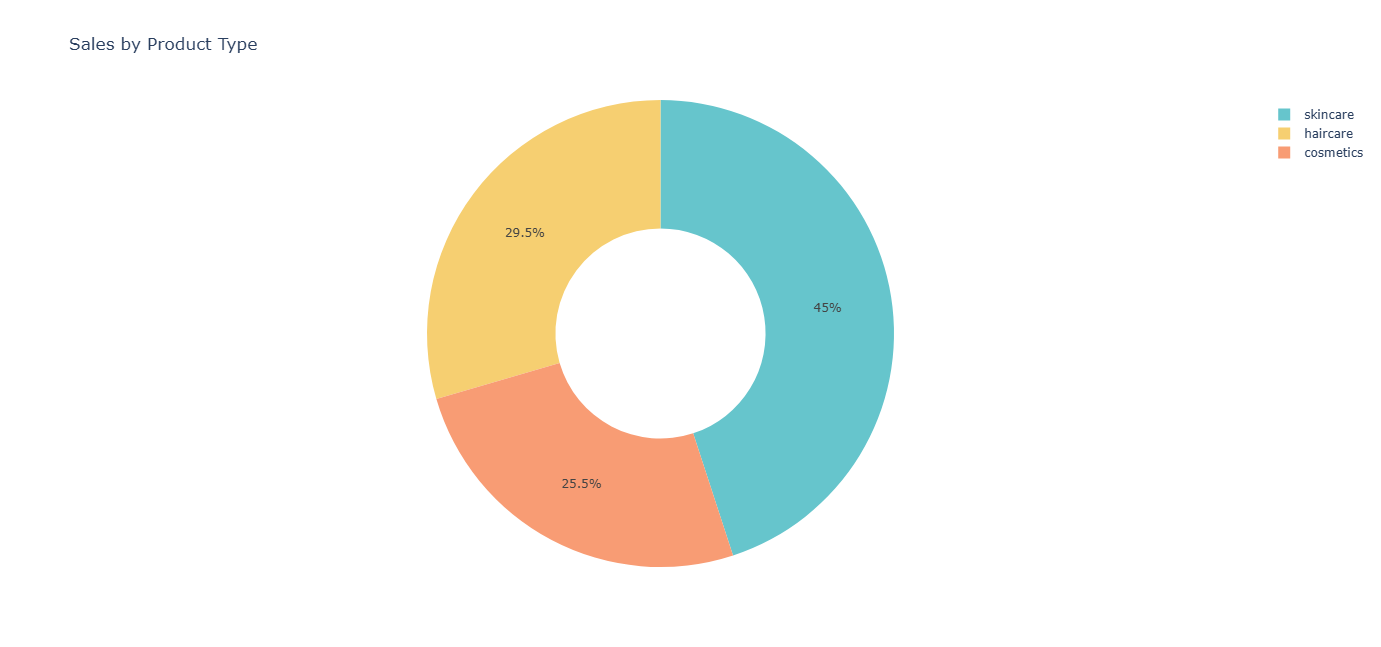

In [90]:
trans_data = data.groupby('Transportation modes')['Number of products sold'].sum().reset_index()

pie_chart = px.pie(trans_data,values='Number of products sold', names='Transportation modes',
                  title='Sales by Product Type',
                  hover_data=['Number of products sold'],
                  hole=0.5,
#                   color_discrete_sequence=px.colors.qualitative.Pastel
                  )
pie_chart.update_traces(textposition='inside',textinfo='percent+label')
pie_chart.show()

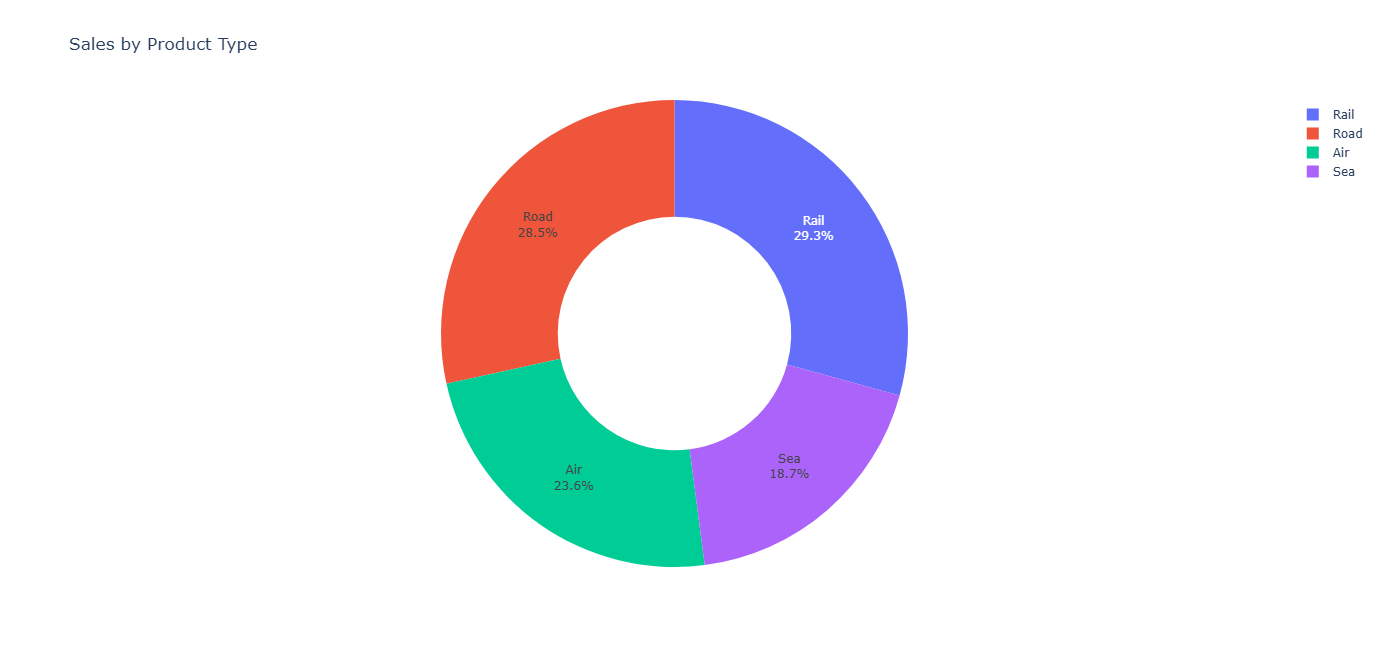

In [93]:
total_revenue = data.groupby('Shipping carriers')['Revenue generated'].sum().reset_index()

fig = go.Figure()
fig.add_trace(go.Bar(x=total_revenue['Shipping carriers'],
                     y=total_revenue['Revenue generated']))
fig.update_layout(title='Total revenue by shipping carrier',
                 xaxis_title='Shipping carrier',
                 yaxis_title='Revenue Generated')
fig.show()

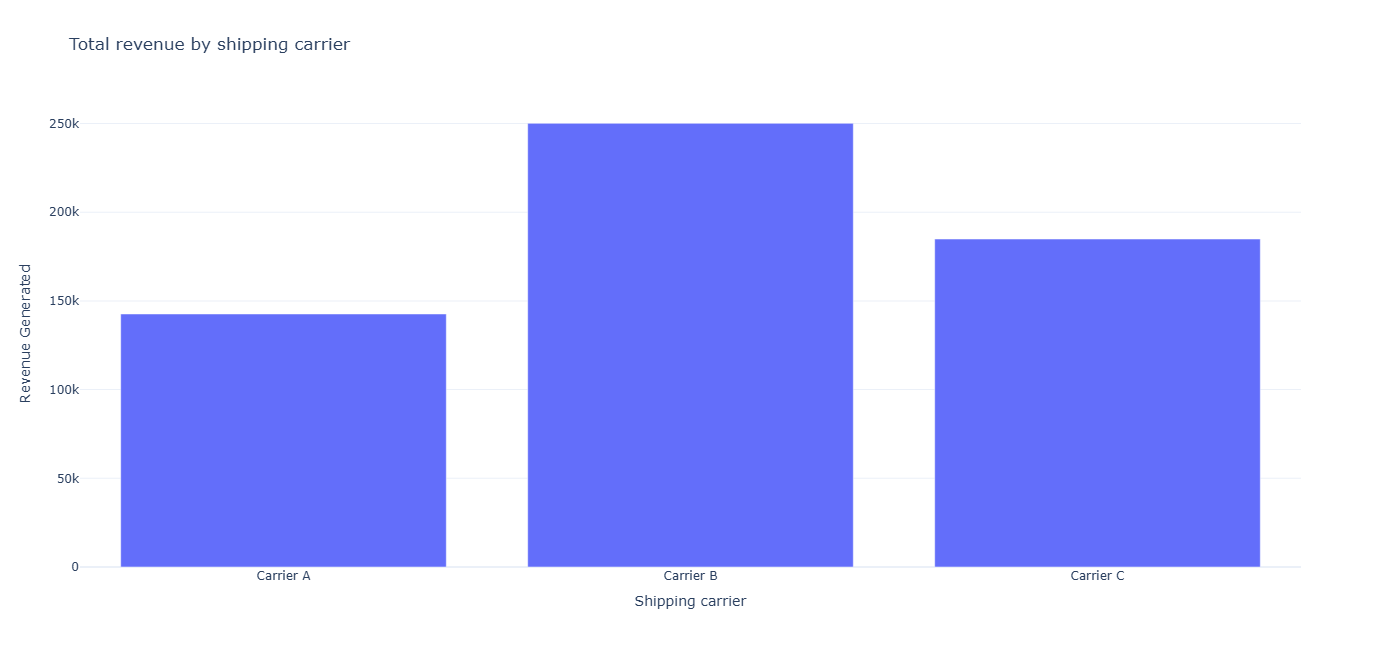

In [96]:
total_revenue = data.groupby('Location')['Revenue generated'].sum().reset_index()

fig = go.Figure()
fig.add_trace(go.Bar(x=total_revenue['Location'],
                    y=total_revenue['Revenue generated']))
fig.update_layout(title='Total Revenue based on location',
                 xaxis_title='Locations',
                 yaxis_title='Revenue generated')
fig.show()

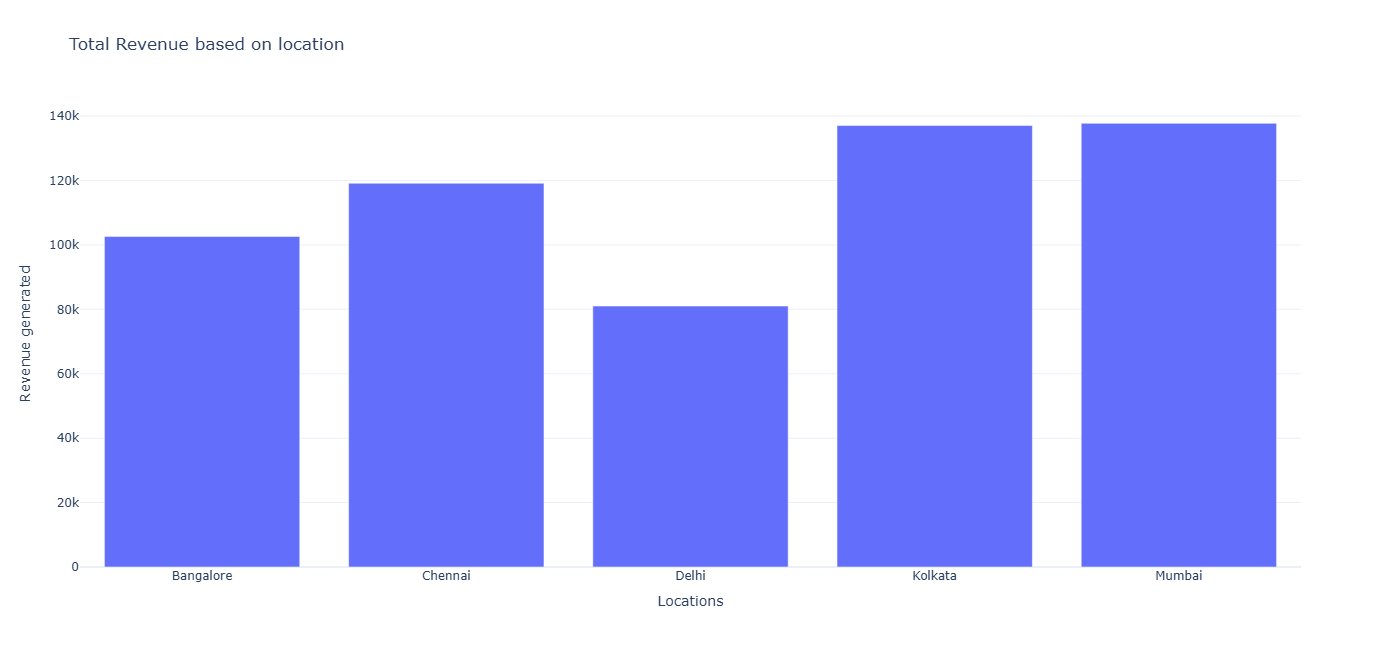

In [99]:
total_revenue = data.groupby('Transportation modes')['Revenue generated'].sum().reset_index()

fig = go.Figure()
fig.add_trace(go.Bar(x=total_revenue['Transportation modes'],
                    y=total_revenue['Revenue generated']))
fig.update_layout(title='Total Revenue based on location',
                 xaxis_title='Transportation modes',
                 yaxis_title='Revenue generated')
fig.show()

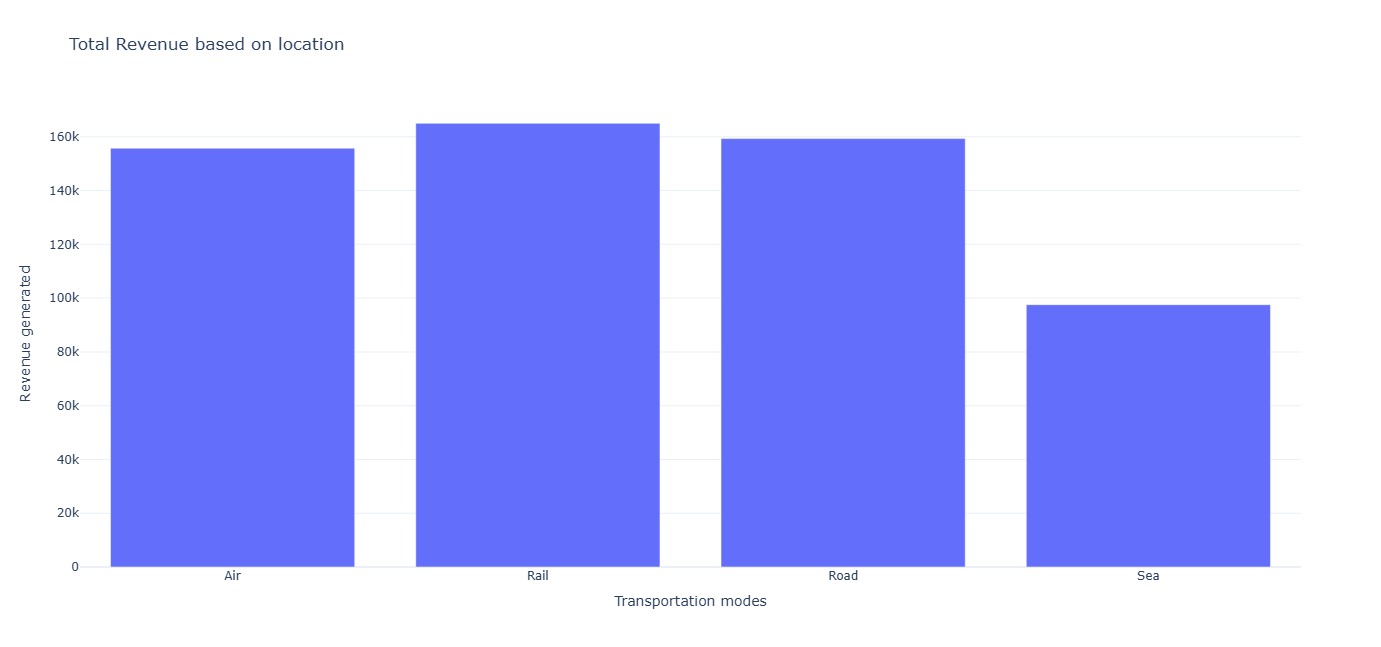

In [102]:
avg_lead_time = data.groupby('Product type')['Lead time'].mean().reset_index()
avg_manufacturing_time = data.groupby('Product type')['Manufacturing costs'].mean().reset_index()
result = pd.merge(avg_lead_time,avg_manufacturing_time, on ='Product type')
result.rename(columns={'Lead time':'Avg lead time','Manufacturing time':'Avg manufacturing time'}, inplace=True)
result

,Product type,Avg lead time,Manufacturing costs
0,cosmetics,13.538462,43.052740
1,haircare,18.705882,48.457993
2,skincare,18.000000,48.993157


In [104]:
shipping_cost_chart = px.bar(data,x='Shipping carriers',
                            y='Shipping costs',
                            title='Shipping Costs by Carrier')
shipping_cost_chart.show()

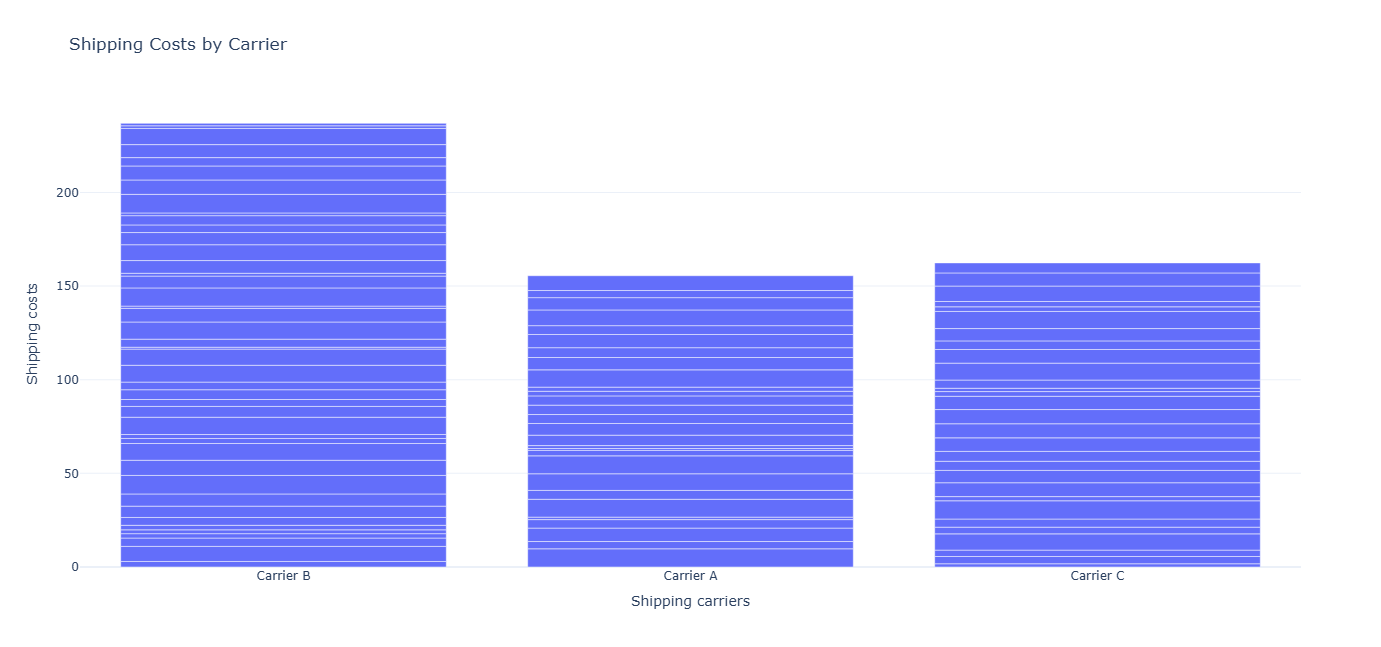

In [107]:
transportation_chart = px.pie(data,
                             values='Costs',
                             names='Transportation modes',
                             title='Cost Distribution by Transportation Mode',
                             hole=0.5,
                             color_discrete_sequence=px.colors.qualitative.Pastel)
transportation_chart.update_traces(textposition='inside',textinfo='percent+label')
transportation_chart.show()

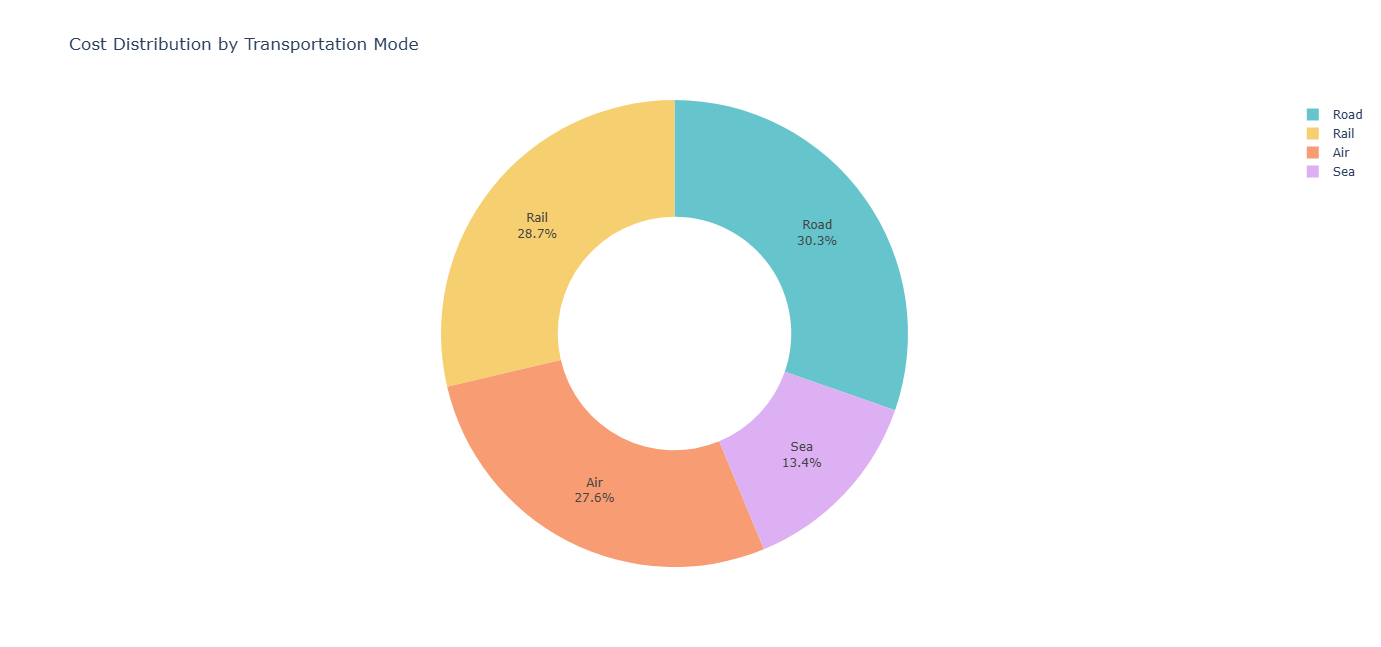

In [110]:
defect_rate_by_product = data.groupby('Product type')['Defect rates'].mean().reset_index()

fig = px.bar(defect_rate_by_product, x='Product type', y='Defect rates',
             title='Average defect rates by product type')
fig.show()

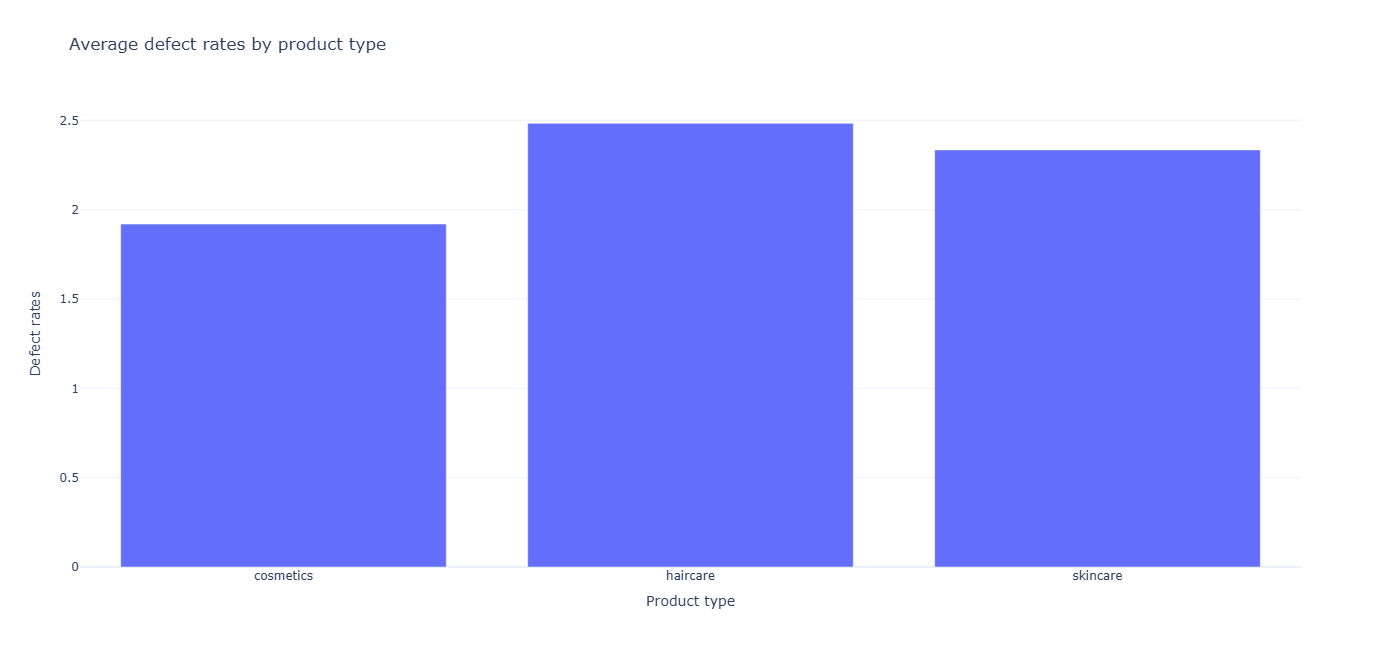

In [113]:
trans = data.groupby('Transportation modes')['Defect rates'].mean().reset_index()

trans_chart = px.pie(trans,values='Defect rates',
                    names='Transportation modes',
                    title='Defect Rates by Transportation Mode',
                    hole=0.5,
                    color_discrete_sequence=px.colors.qualitative.Pastel)
trans_chart.update_traces(textposition='inside',textinfo='label+percent')
trans_chart.show()

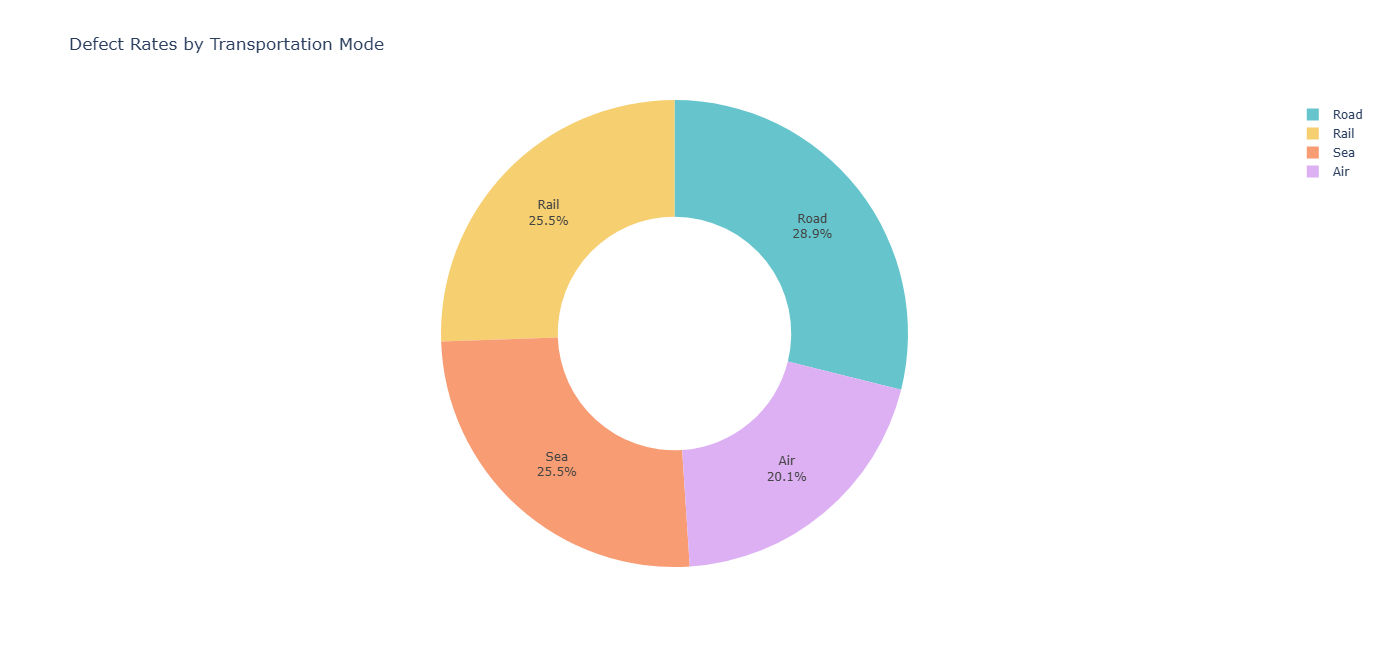

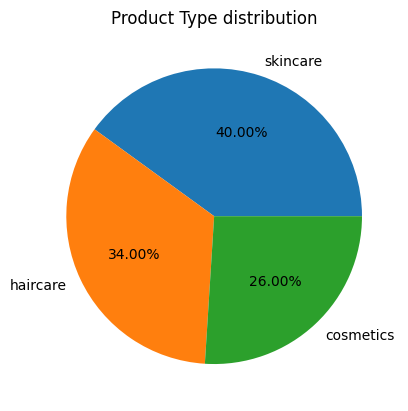

In [116]:
# Display product type distribution in the dataset.
pie_labels = data['Product type'].value_counts().index.to_list()
plt.pie(data['Product type'].value_counts(), autopct="%.2f%%", labels = pie_labels);
plt.title ("Product Type distribution");

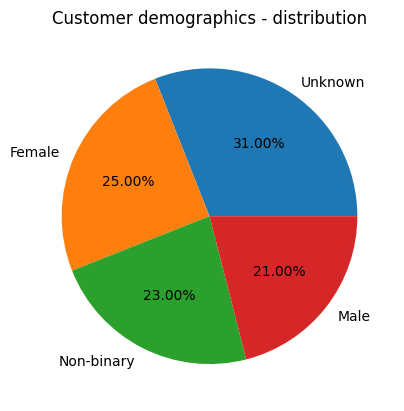

In [118]:
# Draw a plot for Customer demograohics
gender_labels = data['Customer demographics'].value_counts().index.to_list()
plt.pie(data['Customer demographics'].value_counts(), labels=gender_labels, autopct="%.2f%%");
plt.title("Customer demographics - distribution");

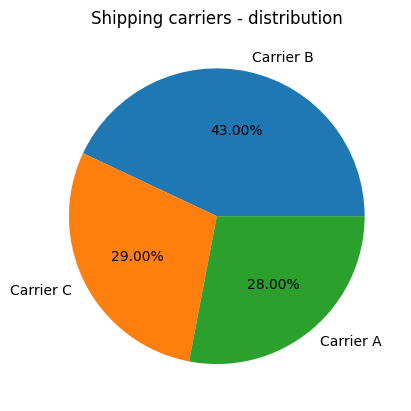

In [120]:
# Draw pie chart
carrier_labels = data['Shipping carriers'].value_counts().index.to_list()
plt.pie(data['Shipping carriers'].value_counts(), labels=carrier_labels, autopct="%.2f%%");
plt.title('Shipping carriers - distribution');

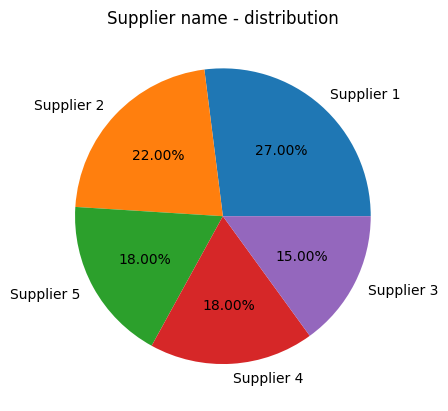

In [122]:
supplier_labels = data['Supplier name'].value_counts().index.to_list();
plt.pie(data['Supplier name'].value_counts(), labels=supplier_labels, autopct="%.2f%%");
plt.title('Supplier name - distribution');

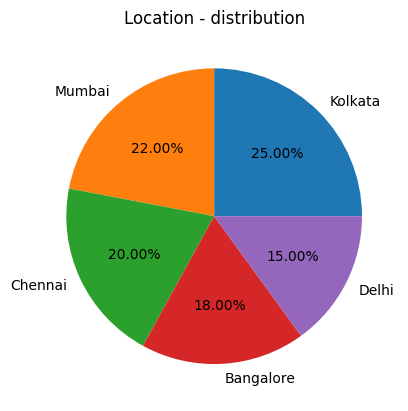

In [124]:
location_labels = data['Location'].value_counts().index.to_list()
plt.pie(data['Location'].value_counts(), labels=location_labels, autopct="%.2f%%");
plt.title ("Location - distribution");

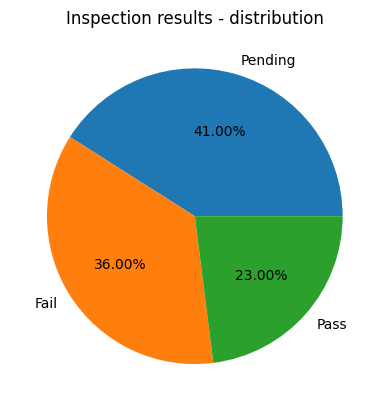

In [126]:
inspection_results_labels=data['Inspection results'].value_counts().index.to_list()

# Draw Pie chart
plt.pie(data['Inspection results'].value_counts(), labels=inspection_results_labels, autopct="%.2f%%");
plt.title("Inspection results - distribution");

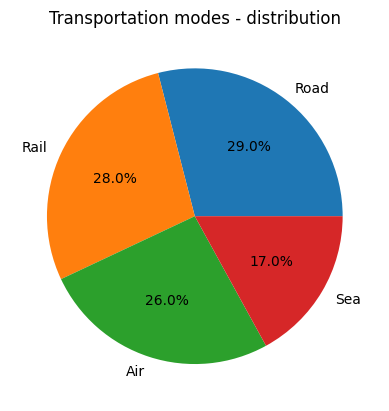

In [128]:
transportation_modes_labels=data['Transportation modes'].value_counts().index.to_list();

plt.pie(data['Transportation modes'].value_counts(), labels=transportation_modes_labels, autopct="%1.1f%%");
plt.title("Transportation modes - distribution");

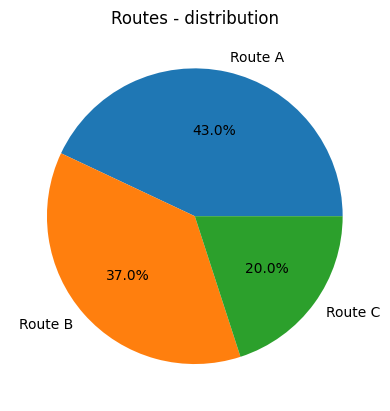

In [130]:
route_labels = data['Routes'].value_counts().index.to_list()

#Draw pie
plt.pie(data['Routes'].value_counts(), labels=route_labels, autopct="%1.1f%%");
plt.title("Routes - distribution");

## Demand Forecasting

Products having high demand ...
High demand can be calculated by the 'number of prodcucts sold' field

In [136]:
# Observations having high number of 'sold products'
data[["Product type","SKU","Number of products sold","Location"]].sort_values("Number of products sold", ascending=False).head(5)

,Product type,SKU,Number of products sold,Location
10,skincare,SKU10,996,Kolkata
94,cosmetics,SKU94,987,Delhi
9,skincare,SKU9,980,Chennai
36,skincare,SKU36,963,Delhi
37,skincare,SKU37,963,Kolkata


Products having low demand

In [143]:
# Observations having lowest number of 'sold products'
data[["Product type","SKU","Number of products sold"]].sort_values("Number of products sold").head(5)

,Product type,SKU,Number of products sold
2,haircare,SKU2,8
45,haircare,SKU45,24
85,cosmetics,SKU85,25
48,haircare,SKU48,29
70,haircare,SKU70,32


# **Location rankings based on 'Product selling'**

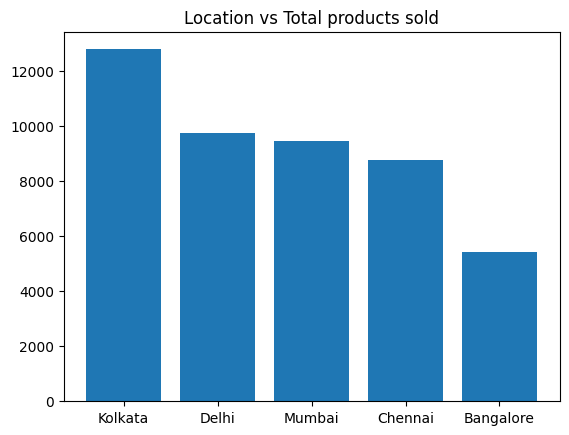

In [146]:
# Extract required fields to seperate data frame
df_loc_product_sell = data[["Location", "Number of products sold"]].copy()

#Group by location and include sum for each location groups
df_loc_product_sell=df_loc_product_sell.groupby('Location').sum()

# Rename the sum field
df_loc_product_sell.rename(columns={'Number of products sold':"SoldProducts"}, inplace=True)

# Sort the rows based on the sum of Sold products
df_loc_product_sell.sort_values(by="SoldProducts",ascending=False, inplace=True)

# Draw the bar graph
plt.bar(df_loc_product_sell.index, df_loc_product_sell['SoldProducts']);
plt.title("Location vs Total products sold");

# Average sales of each product type per location

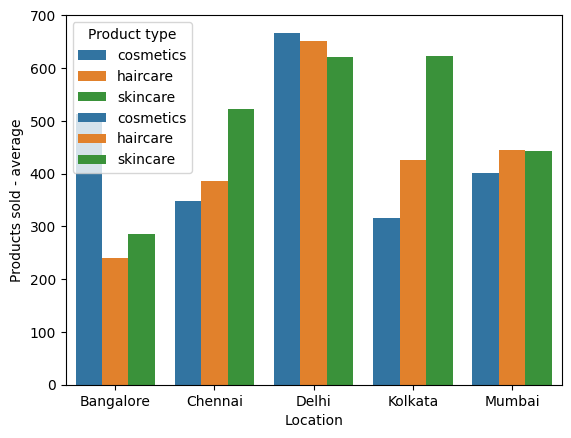

In [149]:
# Create seperate data frame with product type, number of products sold and location
df_product_type_location = data[["Product type","Location", "Number of products sold"]].copy()

# Find the mean value of 'Number of Products sold'
df_product_type_location = df_product_type_location.groupby(["Location","Product type"]).mean()

# Rename the mean value column
df_product_type_location.rename({"Number of products sold":"Products sold - average"},axis = 1, inplace=True)

# Reset the index
df_product_type_location.reset_index(inplace=True)

#Draw the bar graph
sns.barplot(data=df_product_type_location,
            x="Location",
            y="Products sold - average",
            hue="Product type");# Create seperate data frame with product type, number of products sold and location
df_product_type_location = data[["Product type","Location", "Number of products sold"]].copy()

# Find the mean value of 'Number of Products sold'
df_product_type_location = df_product_type_location.groupby(["Location","Product type"]).mean()

# Rename the mean value column
df_product_type_location.rename({"Number of products sold":"Products sold - average"},axis = 1, inplace=True)

# Reset the index
df_product_type_location.reset_index(inplace=True)

#Draw the bar graph
sns.barplot(data=df_product_type_location,
            x="Location",
            y="Products sold - average",
            hue="Product type");

# Product types having more defect rates

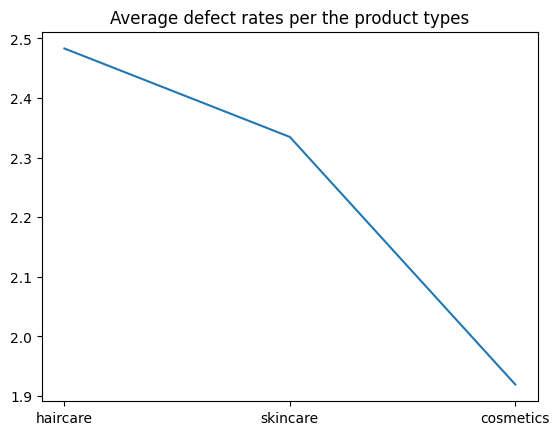

In [154]:
df_product_type_defect= data[['Product type','Defect rates']].copy()

#Group by product types
df_product_type_defect = df_product_type_defect.groupby('Product type').mean()

# Rename the Defect rates column
df_product_type_defect.rename(columns={'Defect rates':'Average defect rates'}, inplace=True)

# Sort the Average defect rates column
df_product_type_defect.sort_values(by="Average defect rates", ascending=False, inplace=True)

# Plot the line graph
plt.plot(df_product_type_defect);
plt.title("Average defect rates per the product types");

# Transportation cost


*   What are the average costs of each transportation modes ?
*   Which transportation having less costs ?



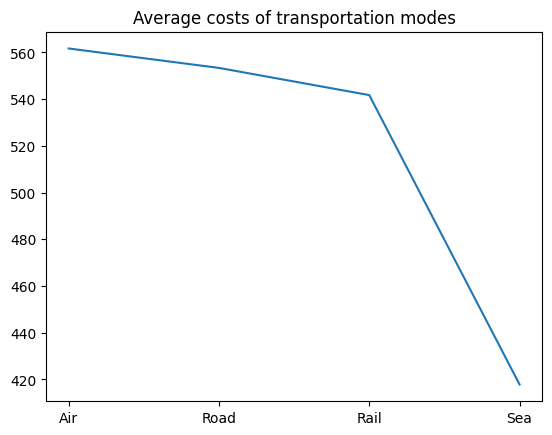

In [158]:
# Create a seperate data frame for Transportation cost analysis
df_transport_cost = data[["Product type", "Transportation modes", "Costs"]].copy()

# Segregate records based on the Transportation modes and find mean of each group
df_transport_cost = df_transport_cost.groupby('Transportation modes').mean('Costs')

# rename the mean field
df_transport_cost.rename(columns={"Costs":"Avg Costs"}, inplace=True)

#Sort the records based on the mean cost value
df_transport_cost.sort_values(by="Avg Costs",ascending=False, inplace=True)

# Visualize the average values of each transportation
plt.plot(df_transport_cost);
plt.title ("Average costs of transportation modes");


*   💡 From this dataset, its clear that Sea transport is cost budget friendly than rail, road and air.
*   💡 As per our general understanding speed will be higher in air, hence the cost also will be higher.
*   💡 Rail transport stays in between high and low budget rates.
*   💡 We can decide the transport based on the urgency and cost efficiency.

# Lead times of each product type per supplier

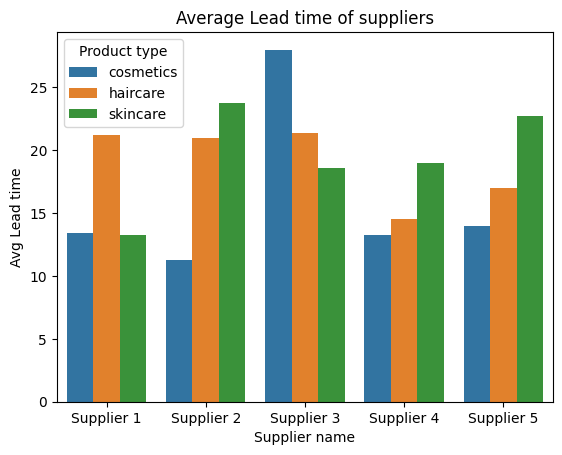

In [164]:
# Create new data frame
df_supplier_product_type = data[['Product type', 'Supplier name', 'Lead time']].copy()

# Group the columns based on the supplier name , product type and find the mean of 'lead time' of each sub group.
df_supplier_product_type = df_supplier_product_type.groupby(['Supplier name', 'Product type']).mean('Lead time')

# Rename the mean column of Lead time
df_supplier_product_type.rename(columns={'Lead time':'Avg Lead time'}, inplace=True)

#Reset the index
df_supplier_product_type.reset_index(inplace=True);

#Draw the bar graph
sns.barplot(data=df_supplier_product_type,
            x="Supplier name",
            y="Avg Lead time",
            hue="Product type"). set_title("Average Lead time of suppliers");


# Product and Customer Analysis

Trend Analysis by Product Type

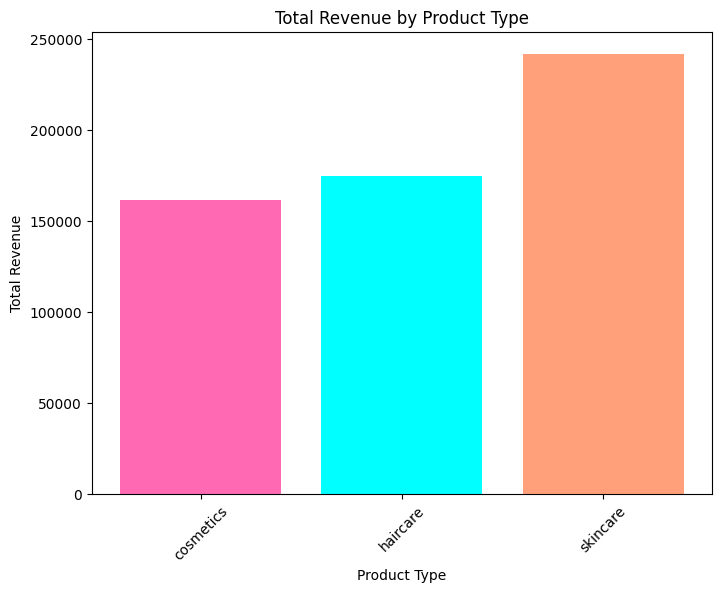

In [172]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors # Import mcolors

# Import data
df = pd.read_csv(r"C:\Users\sekha\Downloads\supply_chain_data.csv")

# Define custom colors for product type
# Use Matplotlib's color names or hex codes
my_colors = {'cosmetics': 'hotpink', 'haircare': mcolors.CSS4_COLORS['cyan'], 'skincare': 'lightsalmon'}

# Calculate Total Revenue by Product Type
total_revenue_by_product_type = df.groupby('Product type')['Revenue generated'].sum().reset_index()

# Create the bar plot
plt.figure(figsize=(8, 6))
plt.bar(total_revenue_by_product_type['Product type'], total_revenue_by_product_type['Revenue generated'], color=total_revenue_by_product_type['Product type'].map(my_colors))
plt.title('Total Revenue by Product Type')
plt.xlabel('Product Type')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()

Average Stock Level by Product Type

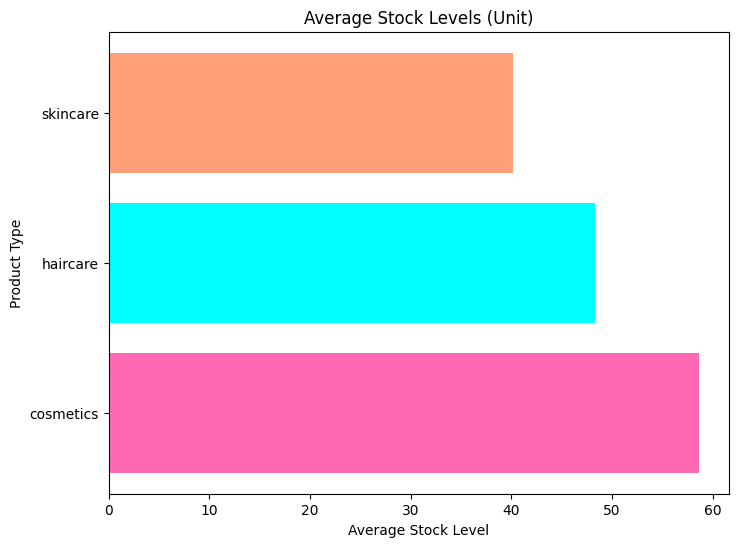

In [175]:
# Calculate Average Stock Level by Product Type
average_stock_level = data.groupby('Product type')['Stock levels'].mean().reset_index()

# Create the bar plot
plt.figure(figsize=(8, 6))
plt.barh(average_stock_level['Product type'], average_stock_level['Stock levels'], color=average_stock_level['Product type'].map(my_colors))
plt.title('Average Stock Levels (Unit)')
plt.xlabel('Average Stock Level')
plt.ylabel('Product Type')
plt.show()

Average lead Times(time from order placement to fulfillment) by Product Type

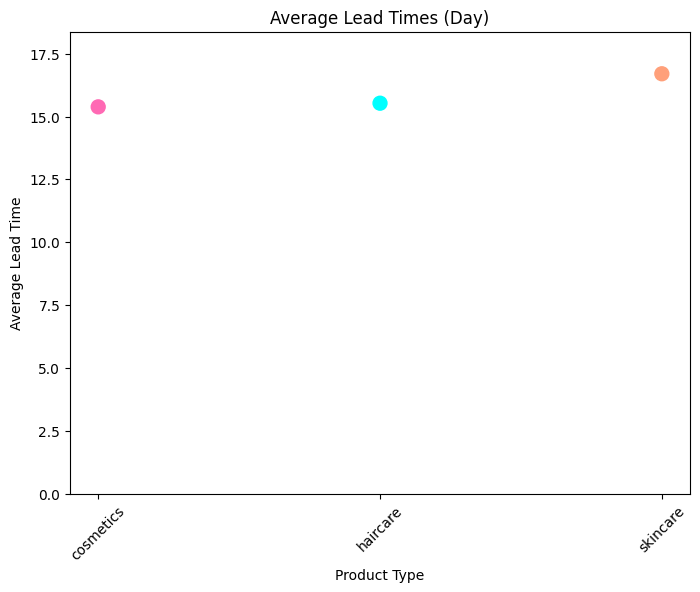

In [178]:
# Calculate Average Lead Times by Product Type
average_lead_times = data.groupby('Product type')['Lead times'].mean().reset_index()

# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(average_lead_times['Product type'], average_lead_times['Lead times'], color=average_lead_times['Product type'].map(my_colors), s=100)  # Adjust point size as needed
plt.title('Average Lead Times (Day)')
plt.xlabel('Product Type')
plt.ylabel('Average Lead Time')
plt.xticks(rotation=45)
plt.ylim(0, average_lead_times['Lead times'].max() * 1.1)  # Adjust y-axis limits
plt.show()

# Predictive Analytics for Future Planning

This analysis uses 'Availability' in relation to 'Price', 'Sales Volume', and 'Lead Times' for predictive insights

**Using Liner regression to analyse how Availability interacts with Price, Number of Products Sold, and Lead Times offers strategic insights for inventory management and forecasting, beneficial even when historical sales data is not available.**

In [185]:
import pandas as pd
import statsmodels.api as sm

# Create the linear regression model
X = data[['Price', 'Number of products sold', 'Lead times']]
X = sm.add_constant(X)  # Add a constant term
y = data['Availability']

model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Availability   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     1.274
Date:                Wed, 13 Aug 2025   Prob (F-statistic):              0.288
Time:                        13:56:39   Log-Likelihood:                -482.01
No. Observations:                 100   AIC:                             972.0
Df Residuals:                      96   BIC:                             982.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

# Scatter plot for Price vs Availability

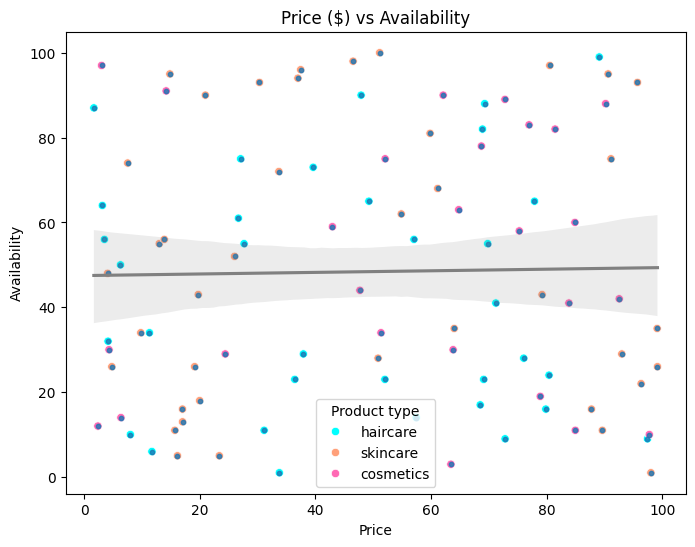

In [189]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create the scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Price', y='Availability', hue='Product type', data=data, palette=my_colors)
sns.regplot(x='Price', y='Availability', data=data, scatter_kws={'s': 10}, line_kws={'color': 'gray'})

plt.title('Price ($) vs Availability')
plt.show()

# Scatter plot for Number of products sold vs Availability

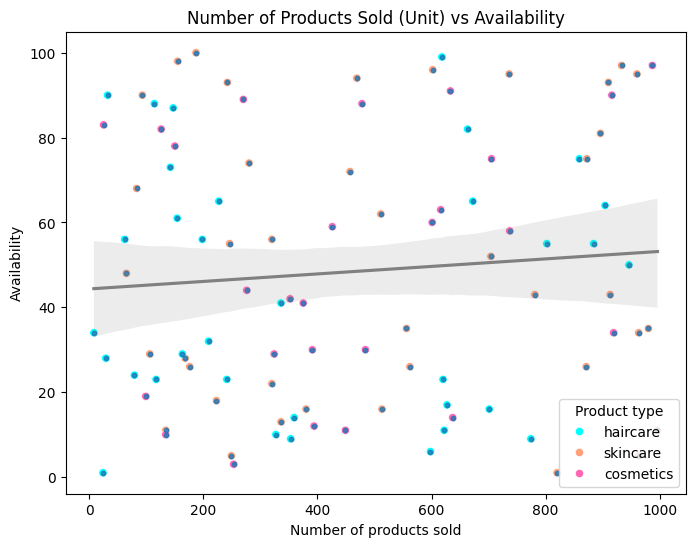

In [192]:
# Create the scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Number of products sold', y='Availability', hue='Product type', data=data, palette=my_colors)
sns.regplot(x='Number of products sold', y='Availability', data=data, scatter_kws={'s': 10}, line_kws={'color': 'gray'})

plt.title('Number of Products Sold (Unit) vs Availability')
plt.show()